In [1]:
import numpy as np
from sklearn import datasets
from sklearn import linear_model
from sklearn.utils import shuffle
import pandas as pd

In [22]:
data = datasets.load_boston()
data.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [23]:
boston = pd.DataFrame(data.data, columns = data.feature_names)
#adding a column 'TARGET'
boston['TARGET'] = data.target

In [24]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
TARGET     0
dtype: int64

In [25]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

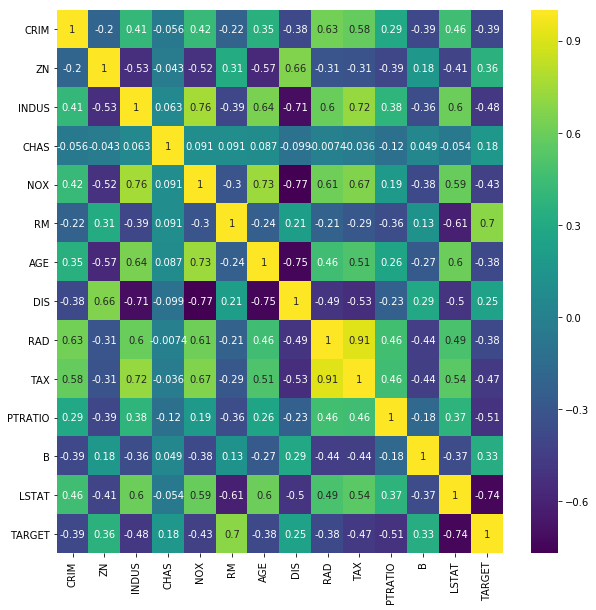

In [30]:
plt.figure(figsize = (10,10))
sns.heatmap(boston.corr(), annot = True, cmap = 'viridis')

In [31]:
x = boston[['INDUS','RM','TAX','PTRATIO','LSTAT']]
y = boston['TARGET']

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 5)
(152, 5)
(354,)
(152,)


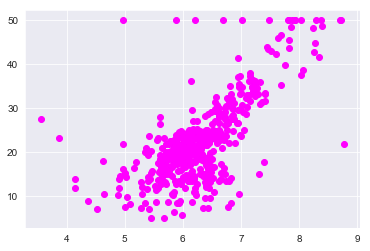

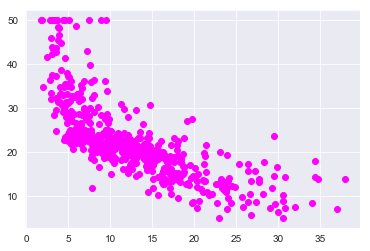

In [35]:
x1 = boston['RM']
x2 = boston['LSTAT']
# Background of graph plot
sns.set_style('darkgrid')
plt.scatter(x1,y, marker = 'o', c = 'magenta')
plt.show()
plt.scatter(x2,y, marker = 'o', c = 'magenta')
plt.show()

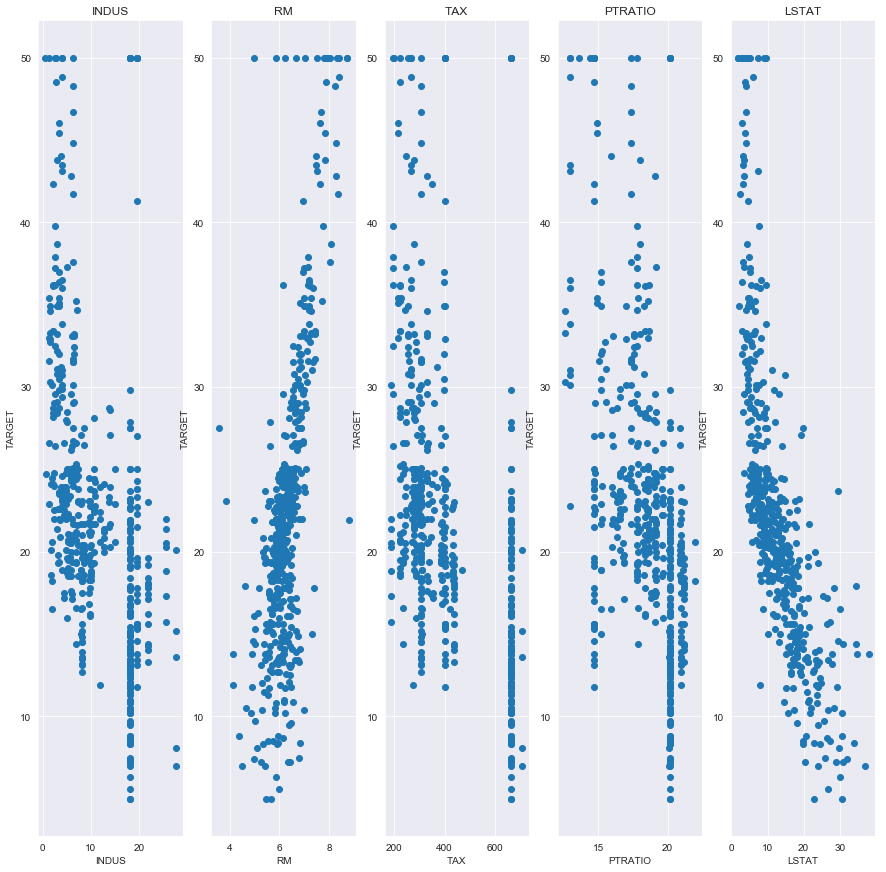

In [39]:
sns.set_style('darkgrid')
features = ['INDUS','RM','TAX','PTRATIO','LSTAT']
target = boston['TARGET']
plt.figure(figsize=(15,15))
#enumerate : list, start index = 0
#enumerate(features): (0,INDUS), (1,RM), (2,TAX), (3,PTRATIO), (4,LSTAT)
for i, col in enumerate(features):
    #plt.subplot (row, column)
    plt.subplot(1, len(features), i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('TARGET')
plt.show()

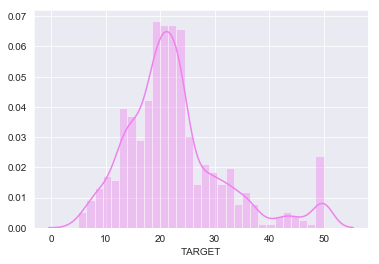

In [42]:
# Normalised or Not
# Bins = No. of Partitions
sns.distplot(boston['TARGET'], bins = 30, color= 'violet')
plt.show()

In [43]:
X = boston[['RM','LSTAT']]
Y = boston['TARGET']

In [57]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features = PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X)

In [76]:
#To avoid overfitting
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_poly,Y, test_size = 0.45, random_state = 0)

In [77]:
lin_model = linear_model.LinearRegression()
lin_model.fit(X_train, Y_train)
lin_model.score(X_test, Y_test)

0.7425235682816742

In [78]:
lin_model.score(X_train, Y_train)

0.7630735286629046

In [79]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [80]:
print(lin_model.coef_)
print(lin_model.intercept_)

[  0.         -14.9672166   -0.28088781   1.6174311   -0.17404045
   0.01798318]
64.96819578669579


In [81]:
Y_train_predict = lin_model.predict(X_train)
#lower the better
print(mean_squared_error(Y_train, Y_train_predict))
#higher the better
print(r2_score(Y_train, Y_train_predict))

21.045364608100602
0.7630735286629046
